In [3]:
import numpy as np

group1 = np.array([[2,8], [2,9], [3,7], [3,8], [3,9], [4,7], [4,8]])
group2 = np.array([[8,2], [8,3], [9,3], [9,4]])

In [4]:
# Calculate centroids
centroid_group1 = np.mean(group1, axis=0)
centroid_group2 = np.mean(group2, axis=0)

In [28]:
centroid_group1

array([3., 8.])

In [29]:
centroid_group2

array([8.5, 3. ])

In [6]:
slope_centroids = (centroid_group2[1]-centroid_group1[1]) / (centroid_group2[0]-centroid_group1[0])

slope_centroids

-0.9090909090909091

In [53]:
slope_hyper = -1/slope_centroids

A = -slope_hyper
B = 1



1.1

In [56]:
A*(sum(group1[:,0])) - A*(sum(group2[:,0])) + B*(sum(group1[:,1])) - B*(sum(group2[:,1]))

58.30000000000001

In [68]:
np.sign( A*group1[0][0] + B*group1[0][1] + -19.433333333333334)

-1.0

In [ ]:
def get_A(group1, group2):
    centroid_group1 = np.mean(group1, axis=0)
    centroid_group2 = np.mean(group2, axis=0)
    slope_centroids = (centroid_group2[1]-centroid_group1[1]) / (centroid_group2[0]-centroid_group1[0])

    slope_hyper = -1/slope_centroids
    return -slope_hyper

In [71]:
def get_C(group1, group2, A,B):
    a1 = A*(sum(group1[:,0])) - A*(sum(group2[:,0]))
    b1 = B*(sum(group1[:,1])) - B*(sum(group2[:,1]))
    
    c1 = (a1+b1) / (-len(group1) + len(group2))
    
    a2 = A*(sum(group1[:,0])) + A*(sum(group2[:,0]))
    b2 = B*(sum(group1[:,1])) + B*(sum(group2[:,1]))
    
    c2 = (a2+b2) / (-len(group1) - len(group2))
    
    if np.sign( A*group1[0][0] + B*group1[0][1] + c1) != np.sign( A*group2[0][0] + B*group2[0][1] + c1):
        return c1
    else:
        return c2

get_C(group1, group2, A,B)

-0.6818181818181812

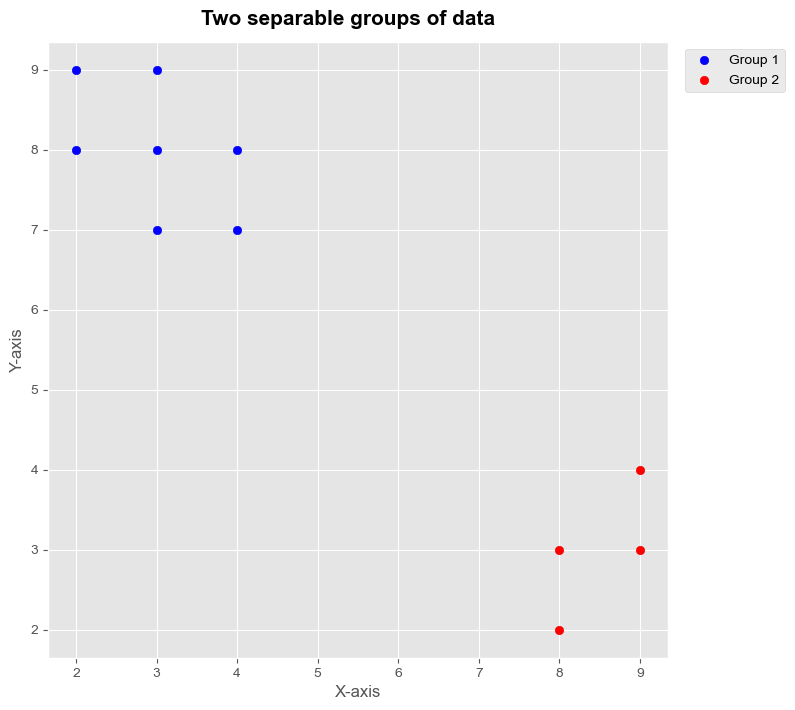

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
plt.style.use('ggplot')  # GGplot la mera cabra

plt.figure(figsize=(8, 8))
plt.scatter(group1[:, 0], group1[:, 1], color='blue', label='Group 1')
plt.scatter(group2[:, 0], group2[:, 1], color='red', label='Group 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.suptitle(
    'Two separable groups of data',
    color='black',
    fontsize=15,
    #loc='center',
    fontweight='bold',
    style='normal',
    family='Arial',
    y=0.92)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)

plt.savefig('scatter.png', dpi=300, bbox_inches='tight') 

plt.show()

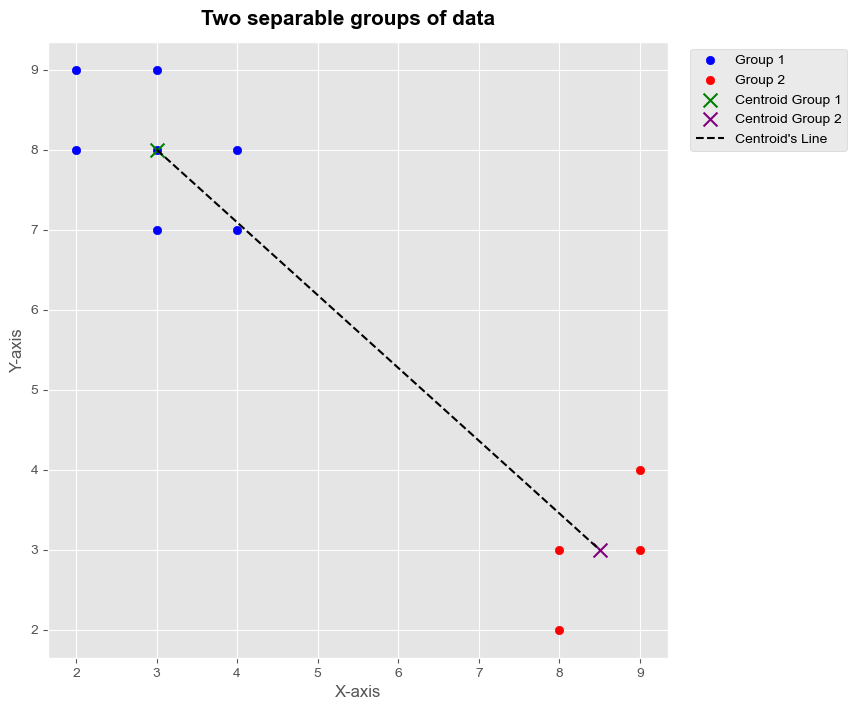

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.style.use('ggplot')  # GGplot la mera cabra

# Sample data
group1 = np.array([[2, 8], [2, 9], [3, 7], [3, 8], [3, 9], [4, 7], [4, 8]])
group2 = np.array([[8, 2], [8, 3], [9, 3], [9, 4]])

# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(group1[:, 0], group1[:, 1], color='blue', label='Group 1')
plt.scatter(group2[:, 0], group2[:, 1], color='red', label='Group 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Calculate centroids
centroid_group1 = np.mean(group1, axis=0)
centroid_group2 = np.mean(group2, axis=0)

# Plot centroids
plt.scatter(centroid_group1[0], centroid_group1[1], color='green', label='Centroid Group 1', marker='x', s=100)
plt.scatter(centroid_group2[0], centroid_group2[1], color='purple', label='Centroid Group 2', marker='x', s=100)

# Connect centroids with a line
plt.plot([centroid_group1[0], centroid_group2[0]], [centroid_group1[1], centroid_group2[1]], 
         color='black', linestyle='--', label="Centroid's Line")

plt.suptitle(
    'Two separable groups of data',
    color='black',
    fontsize=15,
    fontweight='bold',
    style='normal',
    family='Arial',
    y=0.92)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)

plt.savefig('scatter_centroids.png', dpi=300, bbox_inches='tight') 

plt.show()


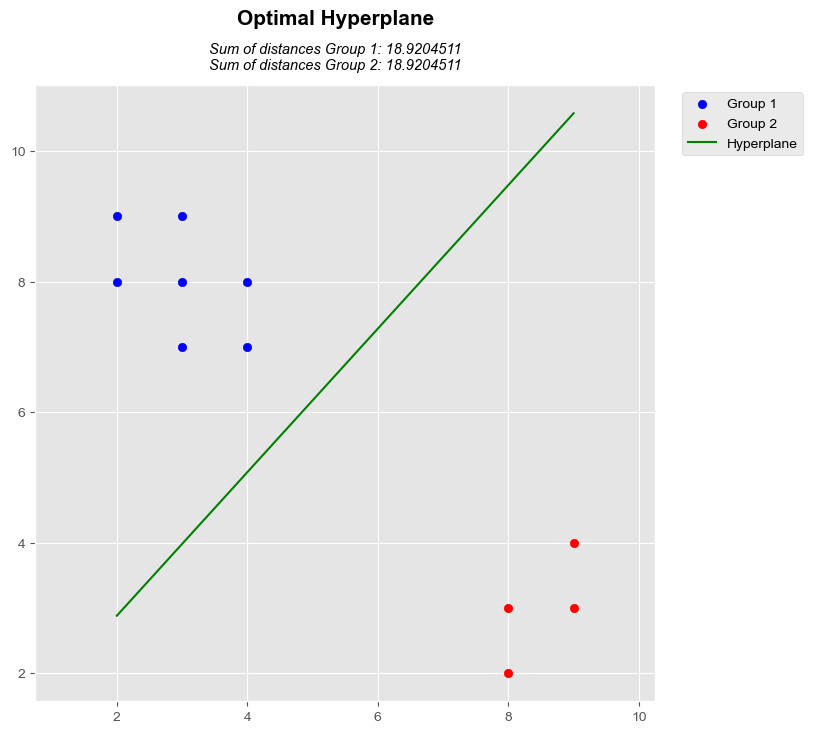

Sum of distances Group 1: 18.920451141512114
Sum of distances Group 2: 18.92045112805866


In [45]:
import numpy as np
import matplotlib.pyplot as plt

def plot_line_and_distances(grupo1, grupo2, A, B, C):
    plt.figure(figsize=(8, 8))
    
    plt.rcParams['font.family'] = 'Arial'
    plt.style.use('ggplot')

    plt.scatter(grupo1[:, 0], grupo1[:, 1], color='blue', label='Group 1')
    plt.scatter(grupo2[:, 0], grupo2[:, 1], color='red', label='Group 2')

    # Extremos de la línea
    x = np.linspace(min(np.min(grupo1[:, 0]), np.min(grupo2[:, 0])), 
                    max(np.max(grupo1[:, 0]), np.max(grupo2[:, 0])), 100)
    
    y = (-A*x - C) / B

    # Plot de la línea
    plt.plot(x, y, color='green', label='Hyperplane')

    distancias_grupo1 = np.abs(A*grupo1[:, 0] + B*grupo1[:, 1] + C) / np.sqrt(A**2 + B**2)
    distancias_grupo2 = np.abs(A*grupo2[:, 0] + B*grupo2[:, 1] + C) / np.sqrt(A**2 + B**2)
    suma_distancias_grupo1 = np.sum(distancias_grupo1)
    suma_distancias_grupo2 = np.sum(distancias_grupo2)

    plt.suptitle(
    'Optimal Hyperplane',
    color='black',
    fontsize=15,
    fontweight='bold',
    style='normal',
    family='Arial',
    y=0.975)
    nota = '''Sum of distances Group 1: 18.9204511
Sum of distances Group 2: 18.9204511'''
    plt.figtext(0.5, 0.9, nota, ha='center', fontsize=10.5, style ='italic', family='Arial')

    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.grid(True)
    plt.axis('equal')
    plt.savefig('optimal.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return suma_distancias_grupo1, suma_distancias_grupo2


grupo1 = np.array([[2,8], [2,9], [3,7], [3,8], [3,9], [4,7], [4,8]])
grupo2 = np.array([[8,2], [8,3], [9,3], [9,4]])
A, B, C = -1.1,1,-0.68181818 

suma_distancias_grupo1, suma_distancias_grupo2 = plot_line_and_distances(grupo1, grupo2, A, B, C)
print("Sum of distances Group 1:", suma_distancias_grupo1)
print("Sum of distances Group 2:", suma_distancias_grupo2)


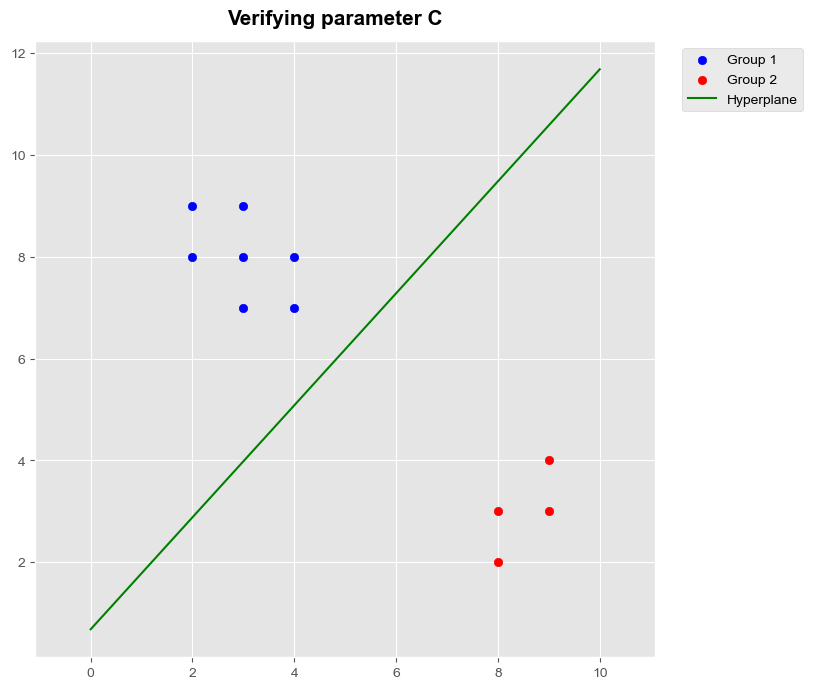

Sum of distances Group 1: 18.920451141512114
Sum of distances Group 2: 18.92045112805866


In [52]:
import numpy as np
import matplotlib.pyplot as plt

def plot_line_and_distances(grupo1, grupo2, A, B, C):
    plt.figure(figsize=(8, 8))
    
    plt.rcParams['font.family'] = 'Arial'
    plt.style.use('ggplot')

    plt.scatter(grupo1[:, 0], grupo1[:, 1], color='blue', label='Group 1')
    plt.scatter(grupo2[:, 0], grupo2[:, 1], color='red', label='Group 2')

    # Extremos de la línea
    x = np.linspace(0, 10, 100)
    
    y = (-A*x - C) / B

    # Plot de la línea
    plt.plot(x, y, color='green', label='Hyperplane')

    distancias_grupo1 = np.abs(A*grupo1[:, 0] + B*grupo1[:, 1] + C) / np.sqrt(A**2 + B**2)
    distancias_grupo2 = np.abs(A*grupo2[:, 0] + B*grupo2[:, 1] + C) / np.sqrt(A**2 + B**2)
    suma_distancias_grupo1 = np.sum(distancias_grupo1)
    suma_distancias_grupo2 = np.sum(distancias_grupo2)

    plt.suptitle(
    'Verifying parameter C',
    color='black',
    fontsize=15,
    fontweight='bold',
    style='normal',
    family='Arial',
    y=0.92)
    nota = '''Sum of distances Group 1: 18.9204511
Sum of distances Group 2: 18.9204511'''
    #plt.figtext(0.5, 0.9, nota, ha='center', fontsize=10.5, style ='italic', family='Arial')

    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.grid(True)
    plt.axis('equal')
    plt.savefig('secondC.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return suma_distancias_grupo1, suma_distancias_grupo2


grupo1 = np.array([[2,8], [2,9], [3,7], [3,8], [3,9], [4,7], [4,8]])
grupo2 = np.array([[8,2], [8,3], [9,3], [9,4]])
A, B, C = -1.1,1,-0.68181818

suma_distancias_grupo1, suma_distancias_grupo2 = plot_line_and_distances(grupo1, grupo2, A, B, C)
print("Sum of distances Group 1:", suma_distancias_grupo1)
print("Sum of distances Group 2:", suma_distancias_grupo2)

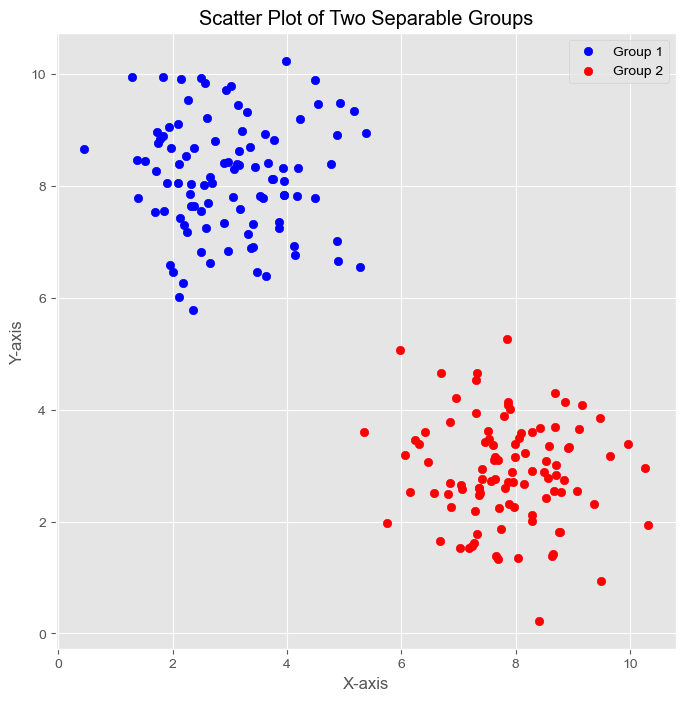

In [72]:
import matplotlib.pyplot as plt

# Generar datos para el grupo 1
np.random.seed(0)  # Para reproducibilidad
mean1 = [3, 8]
cov1 = [[1, 0], [0, 1]]
group1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generar datos para el grupo 2
mean2 = [8, 3]
cov2 = [[1, 0], [0, 1]]
group2 = np.random.multivariate_normal(mean2, cov2, 100)

# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(group1[:, 0], group1[:, 1], color='blue', label='Group 1')
plt.scatter(group2[:, 0], group2[:, 1], color='red', label='Group 2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Scatter Plot of Two Separable Groups')
plt.grid(True)
plt.show()
